## A multidimensional example using GPFlow


In [214]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sample inputs and outputs
X1 = np.random.uniform(-3.,3.,(50,2))
Y1 = X1[:,0:1]**3 + X1[:,1:2]**3 

# define kernel
k =  GPflow.kernels.Polynomial(1,degree=3.,active_dims=[0],ARD=True) + GPflow.kernels.Polynomial(1,degree = 3., active_dims=[1],ARD=True)
m = GPflow.gpr.GPR(X1, Y1, kern=k)
m.optimize()

m 

Name,values,prior,constraint
name.kern.polynomial_2.offset,[ 1.00018756e-06],None,+ve
name.kern.polynomial_2.variance,[ 0.84344095],None,+ve
name.kern.polynomial_1.offset,[ 1.00021606e-06],None,+ve
name.kern.polynomial_1.variance,[ 0.84345505],None,+ve
name.likelihood.variance,[ 1.00000000e-06],None,+ve


### Plotting a contor map of the predictions

In [215]:
# grid data
xlist = np.linspace(-3.0, 3.0, 300)
ylist = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(xlist, ylist)
Z = X**3. + Y**3. # actual results for comparison later

#get the requird results 
mean, var = m.predict_y(np.array([np.reshape(X,(-1,)).T,np.reshape(Y,(-1,))]).T)


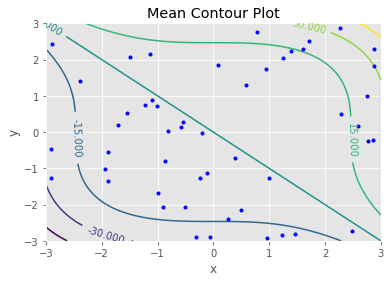

In [216]:
import matplotlib.pyplot as plt
plt.figure()
cp = plt.contour(X, Y, np.reshape(mean,(400,300)))
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.plot(X1[:,0],X1[:,1],'b.')
plt.title('Mean Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



/Users/dna/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10


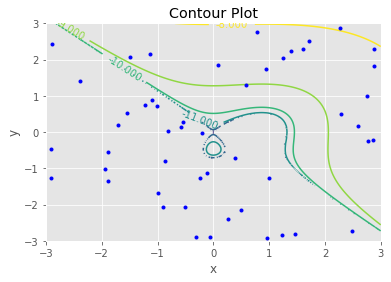

In [225]:
difference = Z-np.reshape(mean,(400,300))

import matplotlib.pyplot as plt
plt.figure()

#as the differences are only due to floating point calculations (ie kernel matches point trend exactly) use logs to show difference
cp = plt.contour(X, Y, np.log10(difference))
plt.clabel(cp, inline=True, fontsize=10)
plt.plot(X1[:,0],X1[:,1],'b.')
plt.title('Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


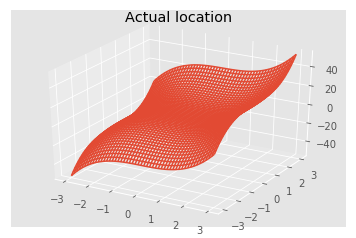

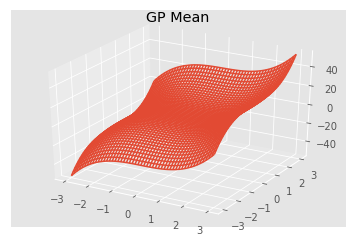

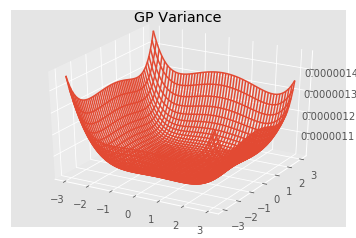

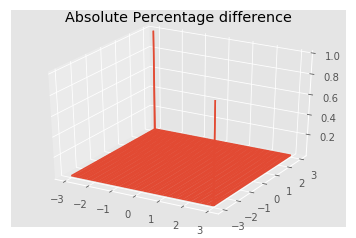

In [229]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
plt.title('Actual location')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, np.reshape(mean,(400,300)))
plt.title('GP Mean')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, np.reshape(var,(400,300)))
plt.title('GP Variance')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, np.abs(difference/np.reshape(mean,(400,300))))
plt.title('Absolute Percentage difference')